# Adaboost-Heart

In [3]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:
df = pd.read_csv('heart.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
x = df.drop('target',axis =1)
y = df['target']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)

In [11]:
ab_model = AdaBoostClassifier(random_state=1)
ab_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

# Evaluation

In [17]:
## Testing data evaluaiton

y_pred = ab_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score :",acc_score)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n', clf_report)

Confusion Matrix :
 [[31 10]
 [11 39]]
Accuracy Score : 0.7692307692307693
Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        41
           1       0.80      0.78      0.79        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



In [19]:
## Training data evaluaiton
y_pred_train = ab_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score :",acc_score)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n', clf_report)

Confusion Matrix :
 [[ 93   4]
 [  5 110]]
Accuracy Score : 0.9575471698113207
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        97
           1       0.96      0.96      0.96       115

    accuracy                           0.96       212
   macro avg       0.96      0.96      0.96       212
weighted avg       0.96      0.96      0.96       212



<AxesSubplot:>

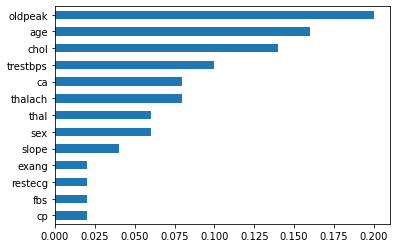

In [28]:
array = ab_model.feature_importances_  
s1 = pd.Series(array)
s1.index = x.columns
s1.sort_values().plot(kind = 'barh')